# 1. Description

In this notebook, we will explore the **Medical Cost Personal Datasets** to build a predictive model that estimates individual medical costs based on personal and demographic features. The dataset includes features such as age, sex, BMI, number of children, smoking status, and region. Our objective is to develop a model that can accurately predict the **charges** for each individual, which can help in understanding medical cost patterns and creating better insurance plans.

### Goals:
1. **Data Preprocessing**: Clean the data, handle missing values, and perform feature engineering.
2. **Exploratory Data Analysis (EDA)**: Visualize and analyze the relationships between features.
3. **Modeling**: Build predictive models including Linear Regression, Lasso, Ridge, and Polynomial Regression.
4. **Model Evaluation**: Evaluate the models using appropriate metrics and select the best-performing one.

This notebook is aimed at showcasing the steps involved in building a predictive model with a real-world dataset and performing detailed analysis to gain insights from the data.


<img src="https://datauab.github.io/post_images/medical_insurance/medical_insurance.png" alt="Image Description" width="700" height="300">


In [1]:
# Libraries Used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Show Data

In [2]:
# Load the dataset & Display first 7 rows
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head(7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [3]:
df.shape

(1338, 7)

In [4]:
# Check the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Summary statistics
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3. Exploratory Data Analysis(EDA)

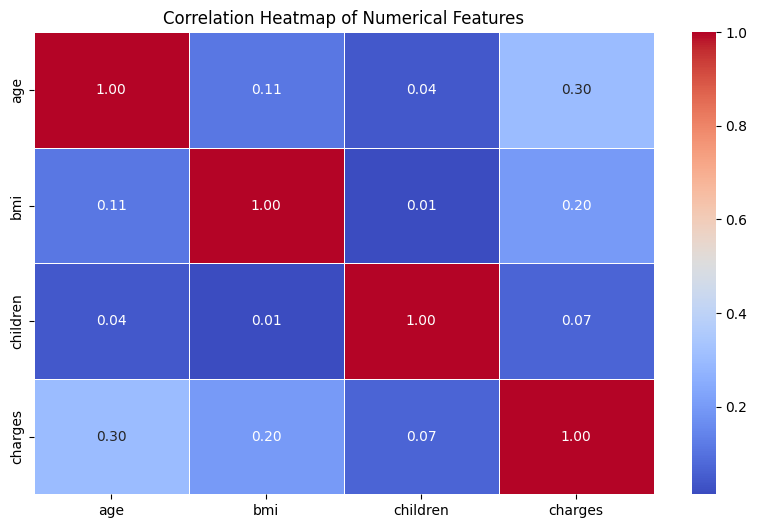

In [7]:
numerical_data = df[['age', 'bmi', 'children', 'charges']]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


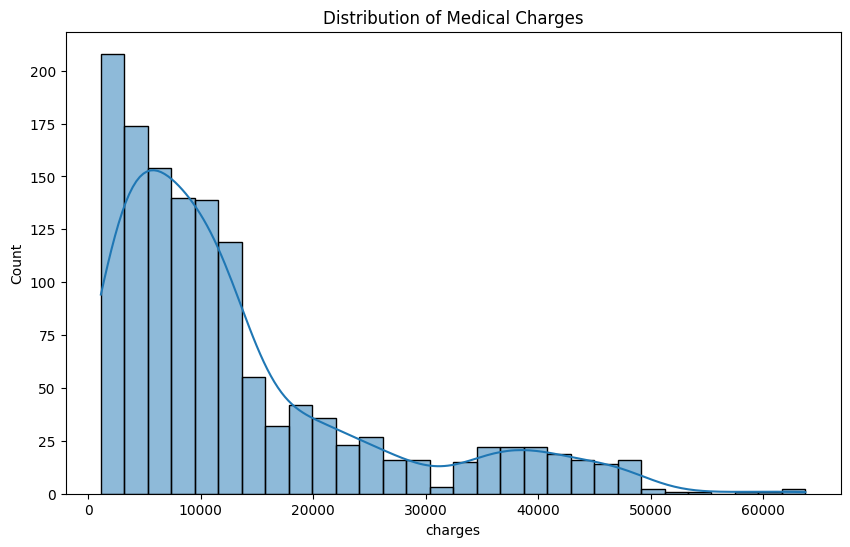

In [8]:
# Distribution of `charges`
featt = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(10,6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Medical Charges')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


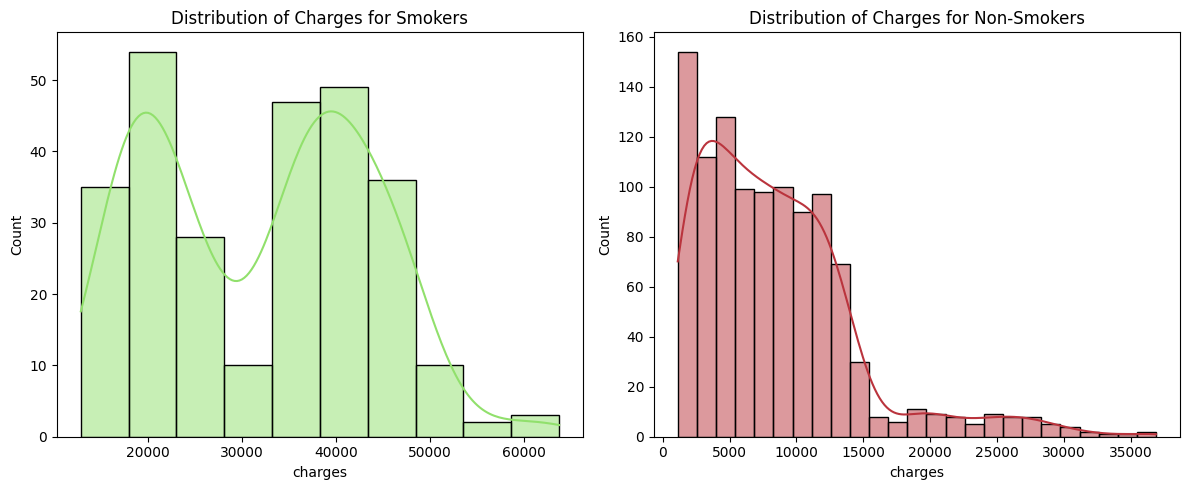

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
f = plt.figure(figsize=(12, 5))

# Plot for smokers
ax1 = f.add_subplot(121)
sns.histplot(df[df['smoker'] == 'yes']["charges"], color='#91e06c', kde=True, ax=ax1)
ax1.set_title('Distribution of Charges for Smokers')

# Plot for non-smokers
ax2 = f.add_subplot(122)
sns.histplot(df[df['smoker'] == 'no']["charges"], color='#ba343d', kde=True, ax=ax2)
ax2.set_title('Distribution of Charges for Non-Smokers')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

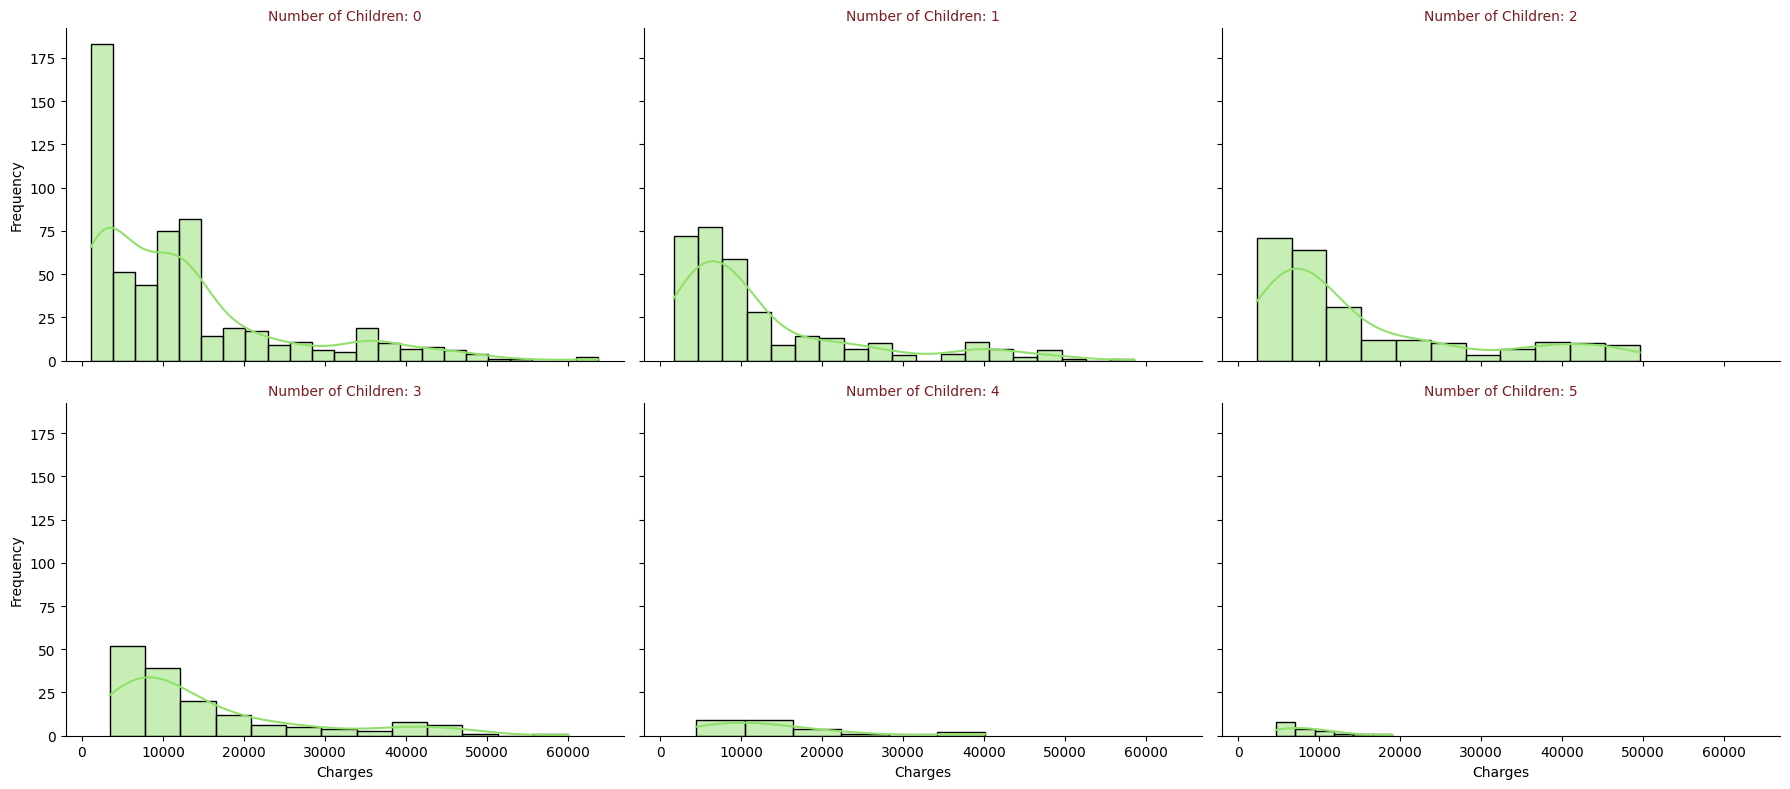

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid to plot the distribution of charges based on number of children
g = sns.FacetGrid(df, col="children", col_wrap=3, height=4, aspect=1.5)

# Plot the distribution of charges for each number of children
g.map(sns.histplot, "charges", kde=True, color='#91e06c')

# Add titles and adjust layout
g.set_axis_labels('Charges', 'Frequency')
g.set_titles("Number of Children: {col_name}",color = '#7a1c22')

# Display the plot
plt.tight_layout()
plt.show()


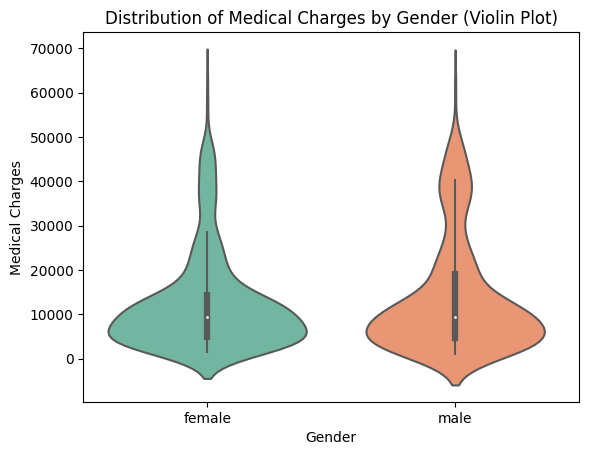

In [11]:
# Violin plot to show distribution of charges by sex
sns.violinplot(x='sex', y='charges', data=df, palette='Set2')

# Adding labels and title
plt.title('Distribution of Medical Charges by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Medical Charges')
plt.show()


# 4. Data Preprocessing

In [12]:
# Create a LabelEncoder object
le = LabelEncoder()

df['smoker'] = le.fit_transform(df['smoker'])
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [13]:
# Apply One-Hot Encoding to the 'region' column and drop the first column
df = pd.get_dummies(df, columns=['region'])

# Display the first few rows to verify the result
df.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,1,16884.92400,False,False,False,True
1,18,male,33.770,1,0,1725.55230,False,False,True,False
2,28,male,33.000,3,0,4449.46200,False,False,True,False
3,33,male,22.705,0,0,21984.47061,False,True,False,False
4,32,male,28.880,0,0,3866.85520,False,True,False,False


# 4. Modeling

In [14]:
# LinearRegression

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'R^2 Score: {score}')


R^2 Score: 0.7832709220325637


In [15]:
# PolynomialFeatures Regression

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),        
            ('poly', PolynomialFeatures(degree=2))
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'R^2 Score: {score}')

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 Scores: {cv_scores}')
print(f'Mean R^2 Score: {cv_scores.mean()}')


R^2 Score: 0.8697967347524499
Cross-validated R^2 Scores: [0.85226674 0.79518473 0.88269712 0.82097592 0.83555129]
Mean R^2 Score: 0.8373351604322601


In [16]:
# Lasso and Ridge Regression

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),              
            ('poly', PolynomialFeatures(degree=2))      
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.01))  
])

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.01))
])

lasso_model.fit(X_train, y_train)
lasso_score = lasso_model.score(X_test, y_test)
print(f'Lasso R^2 Score: {lasso_score}')

ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)
print(f'Ridge R^2 Score: {ridge_score}')

lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=6, scoring='r2')
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=6, scoring='r2')

print(f'Lasso Cross-validated R^2 Scores: {lasso_cv_scores}')
print(f'Ridge Cross-validated R^2 Scores: {ridge_cv_scores}')


Lasso R^2 Score: 0.8695449076283229
Ridge R^2 Score: 0.8695447412352542


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+09, tolerance: 1.639e+07
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+09, tolerance: 1.617e+07
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.913e+08, tolerance: 1.635e

Lasso Cross-validated R^2 Scores: [0.84725015 0.8407212  0.82095767 0.88936402 0.80593921 0.82906578]
Ridge Cross-validated R^2 Scores: [0.84724935 0.84072099 0.82095763 0.88936363 0.80593911 0.82906554]
